## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import os

---
## Importar dados:

In [2]:
df = pd.read_csv('Calc2/x2-y2/X2-y2_ch1/0.dat', delimiter=',', comment='#', header=None, dtype=float)
df.columns = ['energia', 'intensidade']


In [3]:
#plt.plot(np.array(df['energia']),np.array(df['intensidade']))
#plt.show()

In [4]:
peak, _ = find_peaks(df['intensidade'])

In [5]:
peak_indices = peak.tolist()
peak_indices

[200, 203, 637, 710, 768]

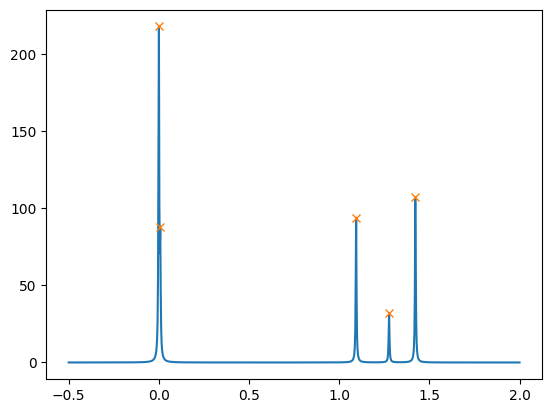

In [6]:
energia = np.array(df['energia'])
intensidade = np.array(df['intensidade'])

plt.plot(energia,intensidade)
plt.plot(energia[peak_indices], intensidade[peak_indices], "x")

---

#### Estabelecido o fluxograma de trabalho, vamos generalizar para todos os nossos arquivos '.dat'
---

## Importar dados e criar dataframe:
- É necessário garantir que os arquivo '.dat' estejam ordenados para que na hora de plotar o gráfico os ângulos estejam corretos;
- Aqui generalizamos para conseguir ler os 15 arquivos e criar uma lista com todos os dataframes.

In [7]:
arquivos = [arquivo for arquivo in os.listdir('Calc2/x2-y2/X2-y2_ch1') if arquivo.endswith('.dat')]

numeros = [int(arquivo.split('.')[0]) for arquivo in arquivos]

In [8]:
def ler_arquivos_dat(pasta, arquivos):
    dataframes = []
    
    # Listar os arquivos na pasta
    arquivos = sorted(arquivos, key=lambda x: int(x.split('.')[0]))  # Ordenar numericamente

    for arquivo in arquivos:
        caminho_arquivo = os.path.join(pasta, arquivo)  # Caminho completo para o arquivo
        df = pd.read_csv(caminho_arquivo, comment='#', delimiter=',', header=None, dtype=float)
        df.columns = ['energia', 'intensidade']  # Renomear as colunas
        dataframes.append((arquivo, df))  # Adicionar o nome do arquivo e o dataframe à lista

    return dataframes


dataframes = ler_arquivos_dat('Calc2/x2-y2/X2-y2_ch1', arquivos)

## Encontrar os picos:

- Aqui nós criamos um dicionário para armazenar as intensidades relativas a cada pico para cada um dos ângulos;
- Foi realizado o Plot dos gráficos de intensidade por energy loss.

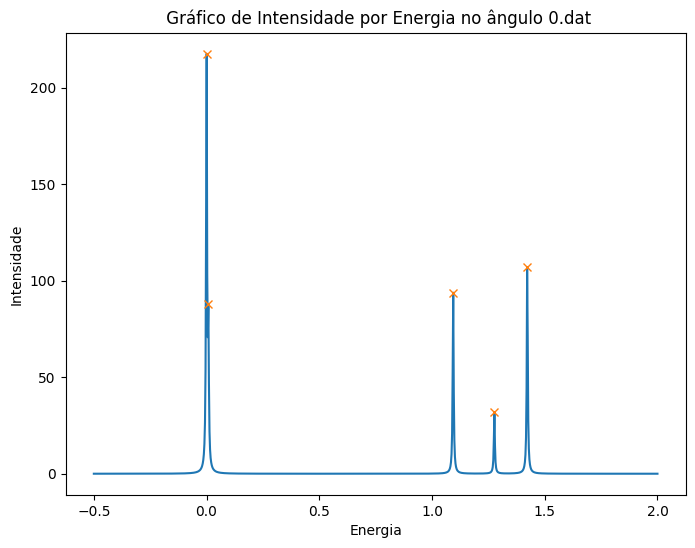

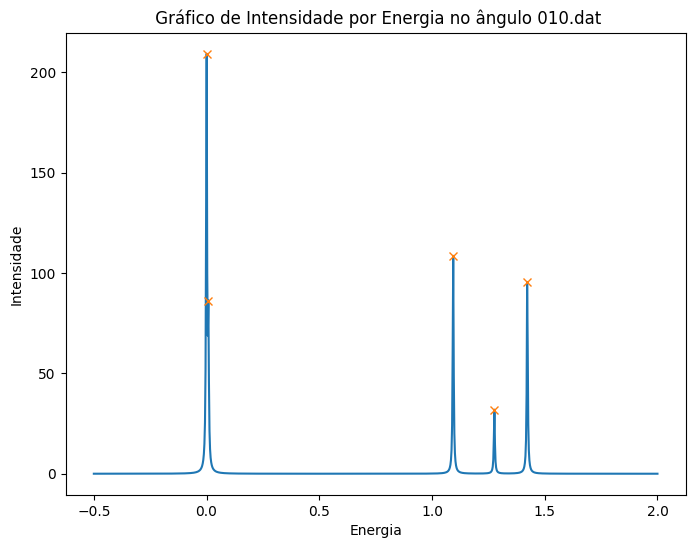

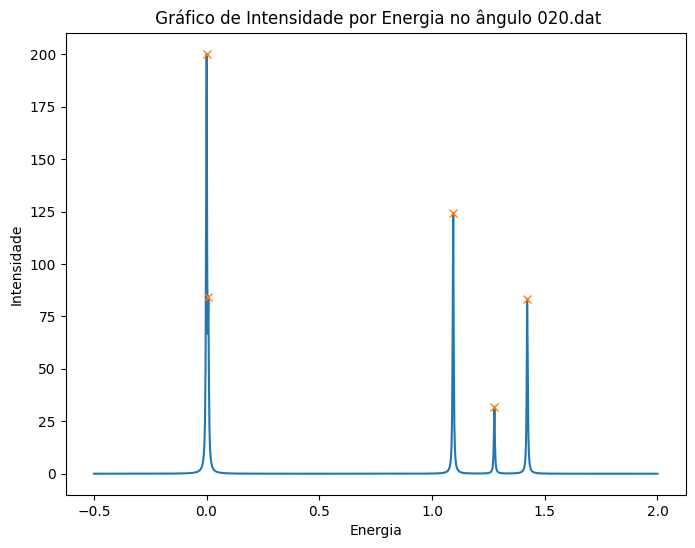

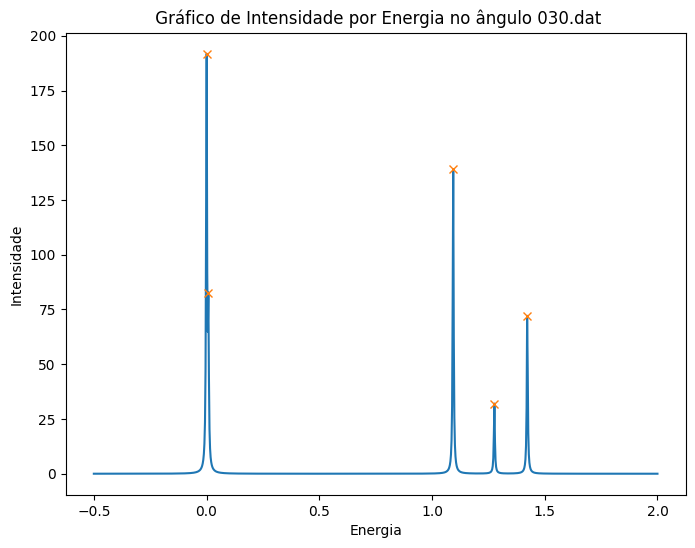

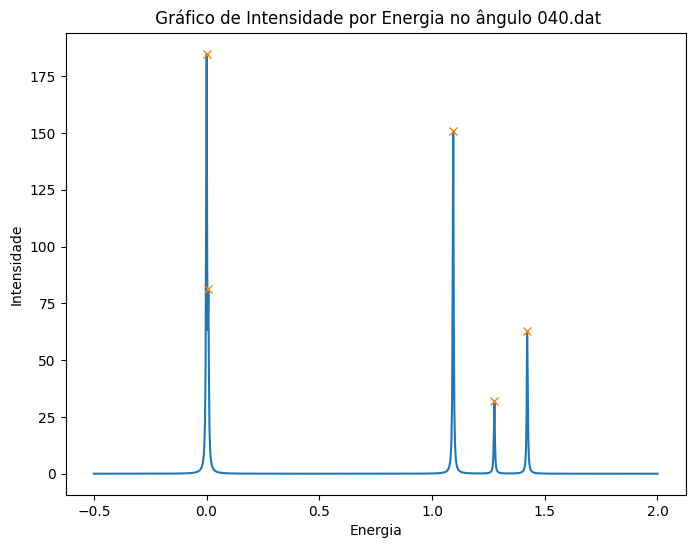

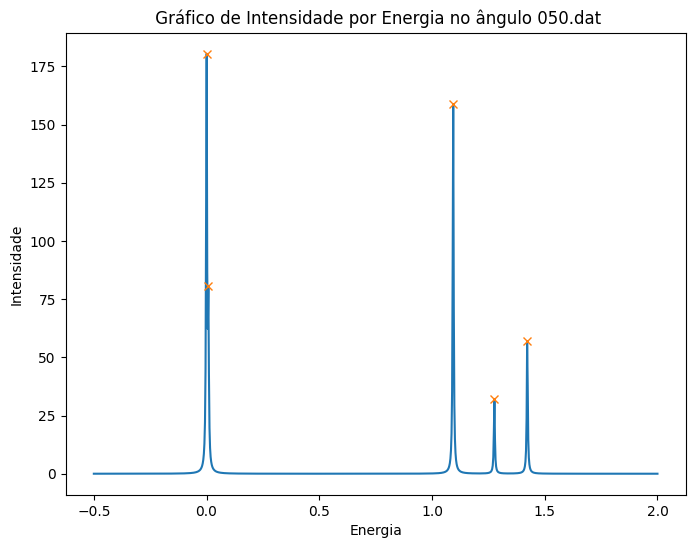

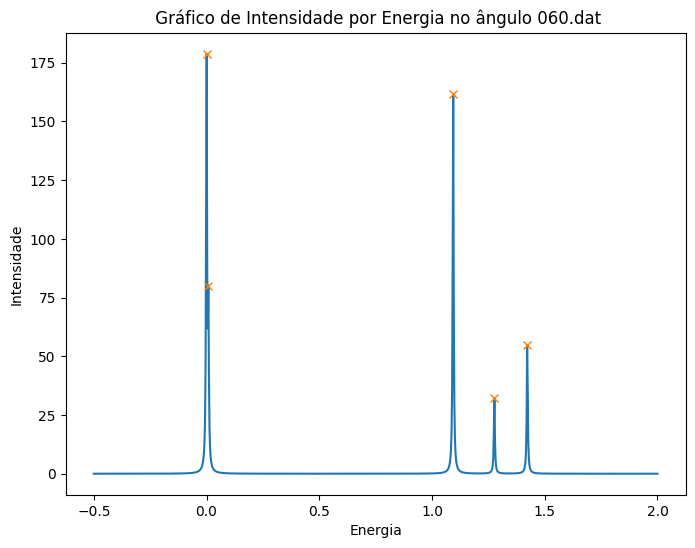

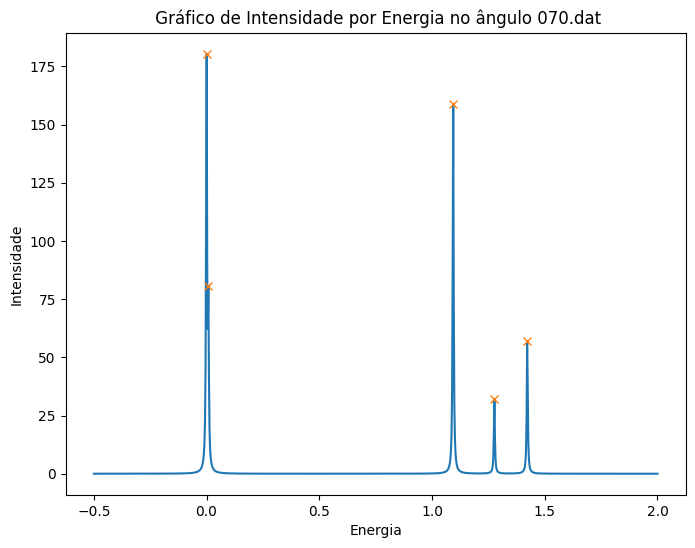

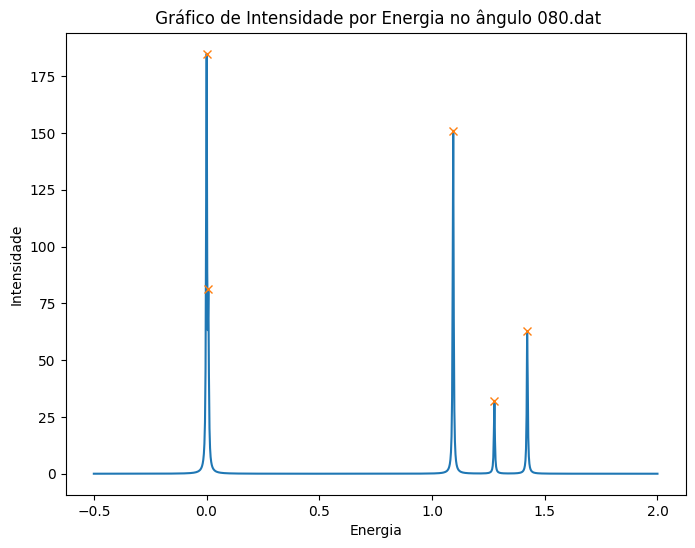

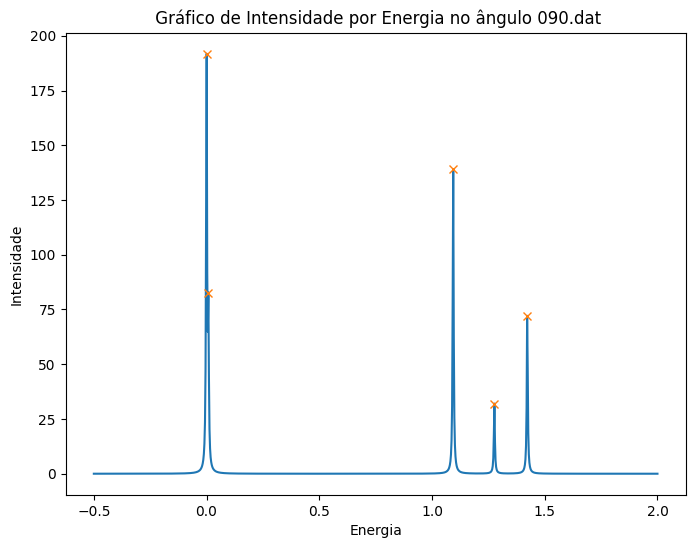

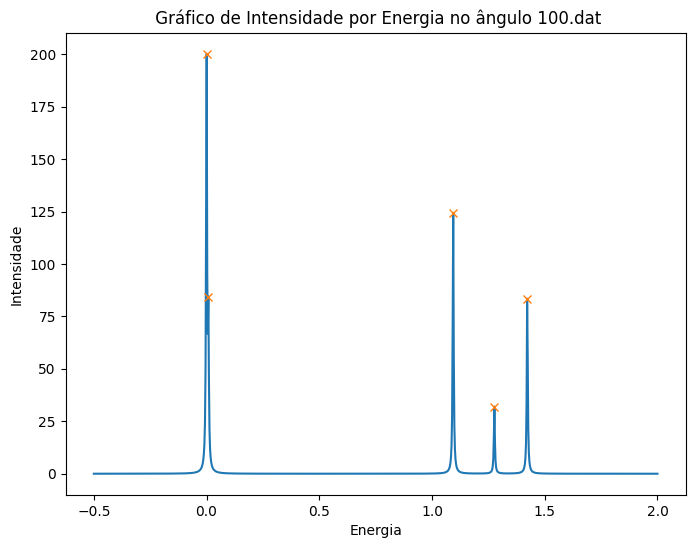

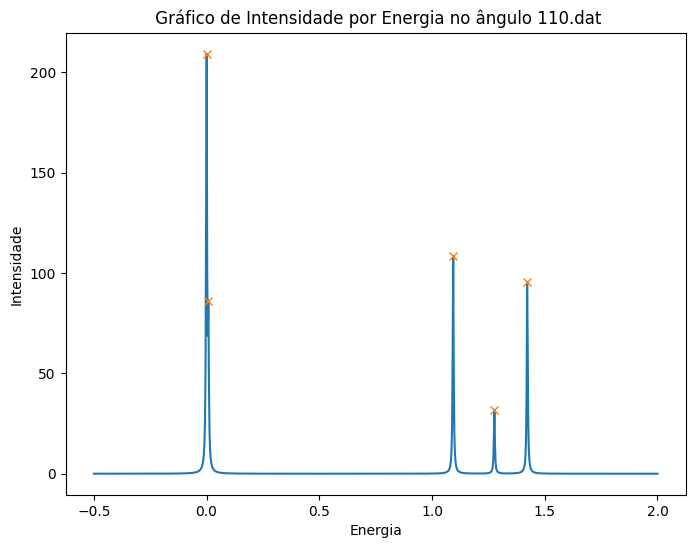

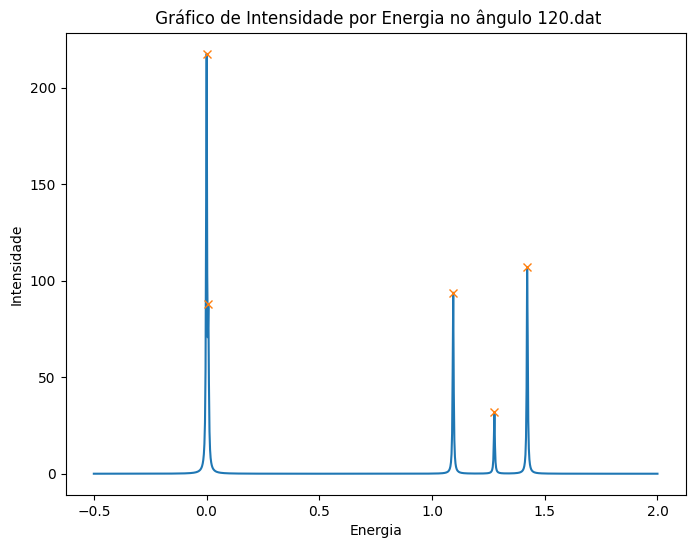

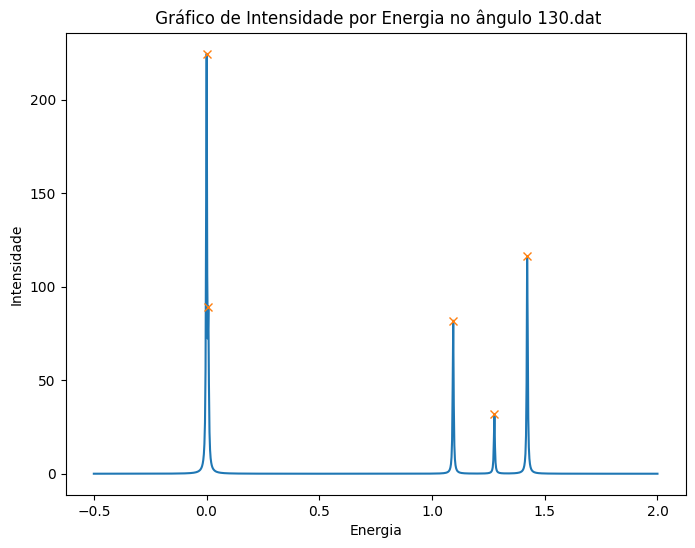

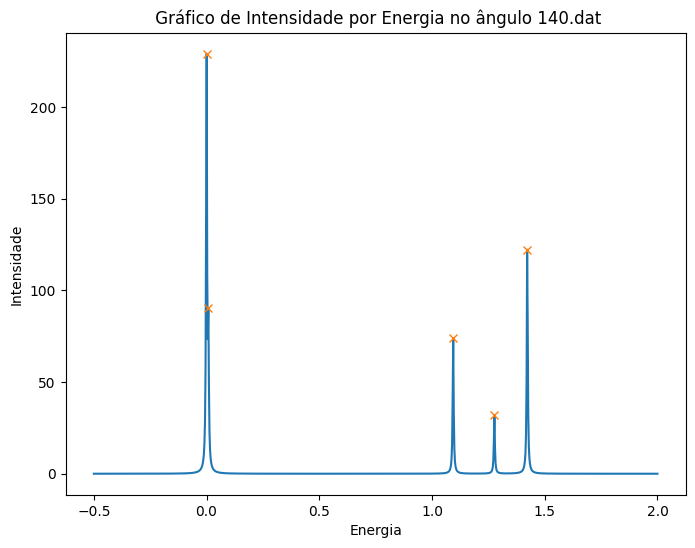

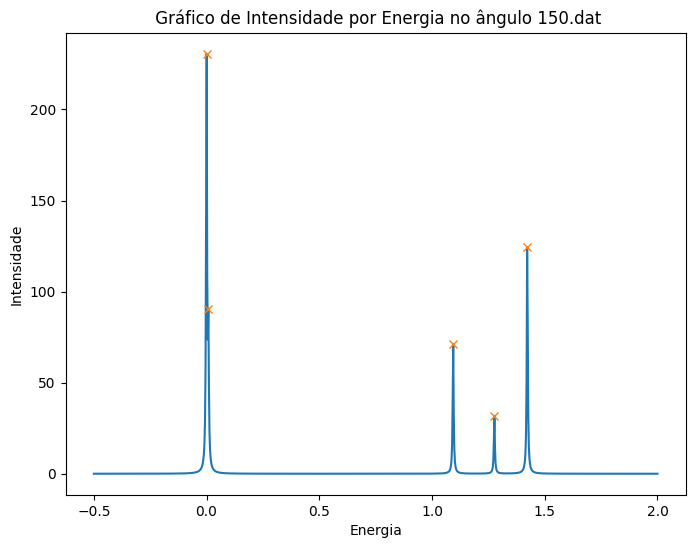

In [9]:
lista_intensidade = {}

for arquivo, df in dataframes:    
    peak, _ = find_peaks(df['intensidade'])  
    
    peak_indices = peak.tolist()
    
    for idx in peak_indices:
        if idx not in lista_intensidade:
            lista_intensidade[idx] = []
        lista_intensidade[idx].append(df['intensidade'].iloc[idx])
    
    energia = np.array(df['energia'])
    intensidade = np.array(df['intensidade'])

    plt.figure(figsize=(8, 6))
    plt.plot(energia, intensidade)
    plt.plot(energia[peak_indices], intensidade[peak_indices], "x")

    # Adicione títulos e rótulos conforme necessário
    plt.title(f' Gráfico de Intensidade por Energia no ângulo {arquivo}')
    plt.xlabel('Energia')
    plt.ylabel('Intensidade')
    
    plt.show()

## Plotando o gráfico de ângulo por intensidade:

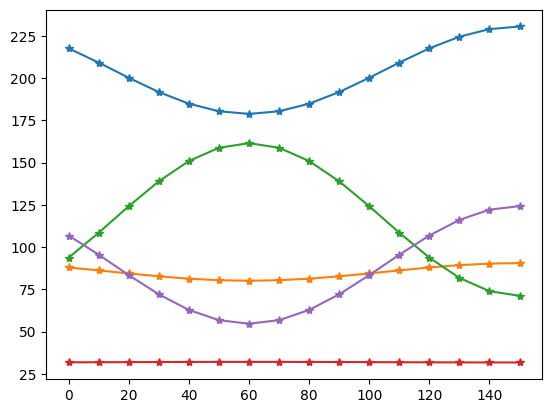

In [10]:
#os valores de x são os ângulo
#os valores de y são as intensidades para cada um dos picos 

for chave, valores in lista_intensidade.items():
    #print(chave, valores)
    plt.plot(numeros, valores, label = chave,  marker = '*')#, s = 100)
    #plt.scatter(numeros, valores, label = chave,  marker = '*')#, s = 100)
    

In [11]:
# https://github.com/danischagas/IP-III---RIXS.git

---

In [12]:
def ler_arquivos_dat(pasta):
    """Lê arquivo .dat e renomeia as colunas como 'energia' e 'intensidade'.
    args:
        pasta: caminho onde se econtra a pasta com os dados
    """
    
    arquivos = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.dat')]
    numeros = [int(arquivo.split('.')[0]) for arquivo in arquivos]
    
    dataframes = []
    
    # Listar os arquivos na pasta
    arquivos = sorted(arquivos, key=lambda x: int(x.split('.')[0]))  # Ordenar numericamente

    for arquivo in arquivos:
        caminho_arquivo = os.path.join(pasta, arquivo)  # Caminho completo para o arquivo
        df = pd.read_csv(caminho_arquivo, comment='#', delimiter=',', header=None, dtype=float)
        df.columns = ['energia', 'intensidade']  # Renomear as colunas
        dataframes.append((arquivo, df))  # Adicionar o nome do arquivo e o dataframe à lista

    return dataframes,numeros


def achando_picos(dataframes):
    
    lista_intensidade = {}

    for arquivo, df in dataframes:    
        peak, _ = find_peaks(df['intensidade'])  

        peak_indices = peak.tolist()

        for idx in peak_indices:
            if idx not in lista_intensidade:
                lista_intensidade[idx] = []
            lista_intensidade[idx].append(df['intensidade'].iloc[idx])

        energia = np.array(df['energia'])
        intensidade = np.array(df['intensidade'])

        #plt.figure(figsize=(8, 6))
        #plt.plot(energia, intensidade)
        #plt.plot(energia[peak_indices], intensidade[peak_indices], "x")
        #
        ### Adicione títulos e rótulos conforme necessário
        #plt.title(f' Gráfico de Intensidade por Energia no ângulo {arquivo}, pasta {pasta}')
        #plt.xlabel('Energia')
        #plt.ylabel('Intensidade')
        plt.show()
        
    return lista_intensidade

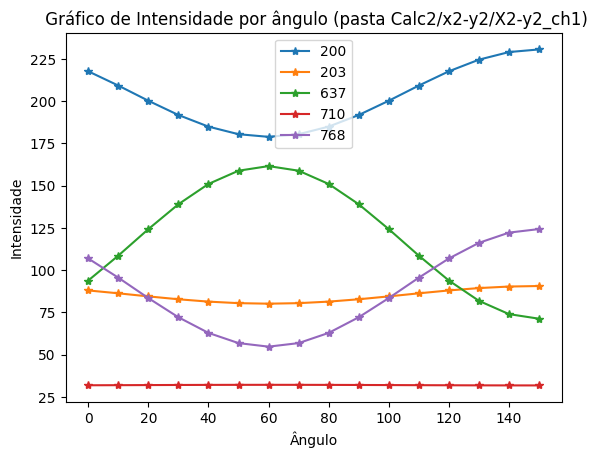

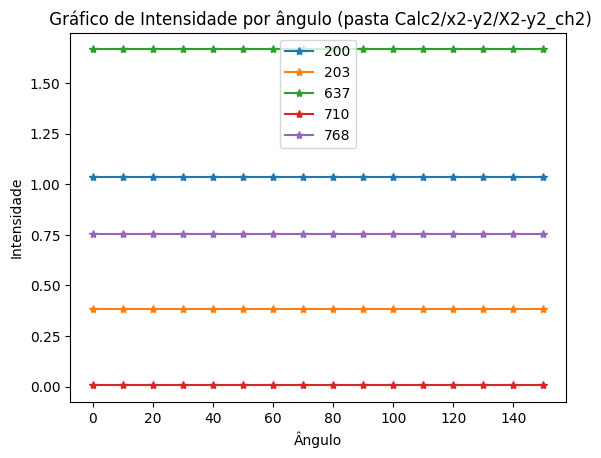

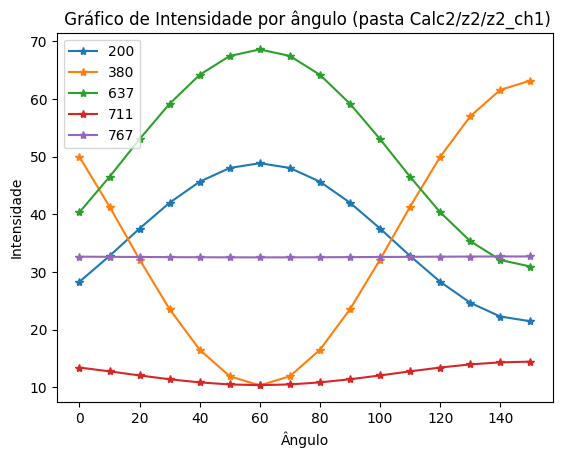

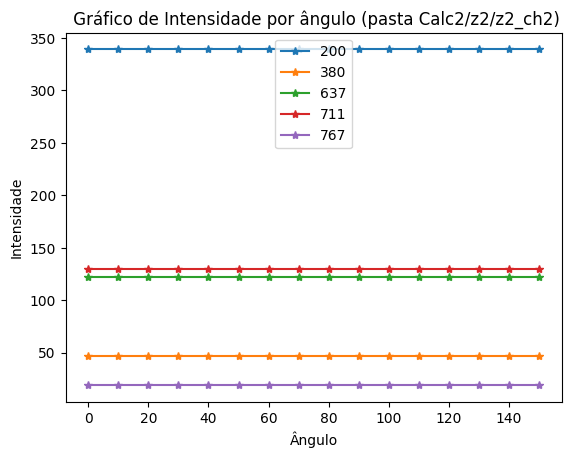

In [13]:

pastas = ['Calc2/x2-y2/X2-y2_ch1', 'Calc2/x2-y2/X2-y2_ch2', 'Calc2/z2/z2_ch1', 'Calc2/z2/z2_ch2']

for pasta in pastas:
    dataframes, numeros = ler_arquivos_dat(pasta)
    lista_intensidade = achando_picos(dataframes)
    
    for chave, valores in lista_intensidade.items():
        #print(chave, valores)
        plt.plot(numeros, valores, label = chave,  marker = '*')#, s = 100)
        plt.legend()
        plt.title(f' Gráfico de Intensidade por ângulo (pasta {pasta})')
        plt.xlabel('Ângulo')
        plt.ylabel('Intensidade')